# Analyzing California high school SAT performance vs. poverty level

In this example, we use pandas and its [merge](http://pandas.pydata.org/pandas-docs/stable/merging.html) function to analyze the relationship betweem SAT performance and percentage of students eligible for free and reduced-price lunch (a common proxy for poverty).

You can read more about the data collection at this notebook: [Data-Extraction--CDE-XLS.ipynb](Data-Extraction--CDE-XLS.ipynb)



In [2]:
%matplotlib inline

from os.path import join
import matplotlib.pyplot as plt
import pandas as pd
DATA_DIR = join('data', 'schools', 'extracted')
frpm_dataname = join(DATA_DIR, 'frpm-2014.csv')
sat_dataname = join(DATA_DIR, 'sat-2014.csv')


In [3]:
frpm_df = pd.read_csv(frpm_dataname, na_values=['*'])
sat_df = pd.read_csv(sat_dataname, na_values=['*'])

# Filtering the SAT schools
sat_df = sat_df[sat_df['number_of_test_takers'] >= 20] 

# Warmup: single dataset analysis

The SAT dataset includes a breakdown of scores by reading, writing, and math.

Are high SAT reading scores correlated with high SAT writing scores? 

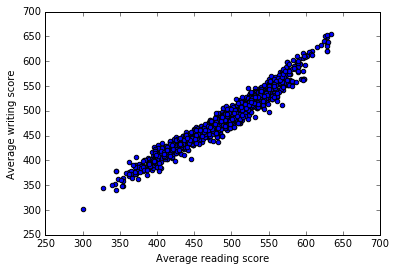

In [4]:
plt.scatter(sat_df['avg_reading_score'], 
            sat_df['avg_writing_score'])
plt.xlabel('Average reading score')
plt.ylabel('Average writing score');


Looks like there's a correlation between reading and writing scores. What about writing and math?


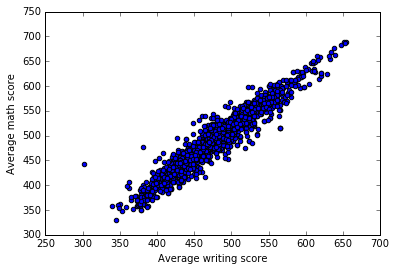

In [5]:
plt.scatter(sat_df['avg_writing_score'], 
            sat_df['avg_math_score'])
plt.xlabel('Average writing score')
plt.ylabel('Average math score');


# Relationship between poverty and SAT scores

Bigger questions require more datasets. Let's test the relationship between poverty and SAT scores.


In [6]:
# merging the dataframes
xdf = pd.merge(left=sat_df, right=frpm_df, on='cds')

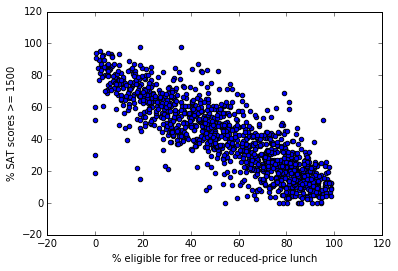

In [7]:
plt.scatter(xdf['adjusted_pct_eligible_frpm_k12'] * 100, 
            xdf['percent_scores_gte_1500'])
plt.xlabel('% eligible for free or reduced-price lunch')
plt.ylabel('% SAT scores >= 1500');

The relationship is not as highly correlated as reading vs. writing scores, but with few exceptions, schools that have a high percentage of students eligible for free/reduced-price lunch have a lower percentage of students who score above 1500.